# Workflow examples with R2BEAT 
# Scenario 1
Only a sampling frame containing the units of the population 
of reference is available, no previous round of the sampling survey to be 
planned

In [1]:
# Install last version of R2BEAT and ReGenesees
#install.packages("devtools")
#devtools::install_github("DiegoZardetto/ReGenesees",dependencies = FALSE)
#devtools::install_github("barcaroli/R2BEAT",dependencies=FALSE)
library("R2BEAT")

Caricamento del pacchetto richiesto: devtools

Caricamento del pacchetto richiesto: usethis

Caricamento del pacchetto richiesto: sampling

Caricamento del pacchetto richiesto: glue



In [2]:
packageVersion("R2BEAT")

[1] '1.0.4'

In [3]:
## Sampling frame
load("pop.RData")
str(pop)

'data.frame':	2258507 obs. of  13 variables:
 $ region       : Factor w/ 3 levels "north","center",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ province     : Factor w/ 6 levels "north_1","north_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ municipality : num  1 1 1 1 1 1 1 1 1 1 ...
 $ id_hh        : Factor w/ 963018 levels "H1","H10","H100",..: 1 1 1 2 3 3 3 3 1114 1114 ...
 $ id_ind       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ stratum      : Factor w/ 24 levels "1000","2000",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ stratum_label: chr  "north_1_6" "north_1_6" "north_1_6" "north_1_6" ...
 $ sex          : int  1 2 1 2 1 1 2 2 1 1 ...
 $ cl_age       : Factor w/ 8 levels "(0,14]","(14,24]",..: 3 7 8 5 4 6 6 4 4 1 ...
 $ active       : num  1 1 0 1 1 1 1 1 1 0 ...
 $ income_hh    : num  30488 30488 30488 21756 29871 ...
 $ unemployed   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ inactive     : num  0 0 1 0 0 0 0 0 0 1 ...


## Precision constraints

In [4]:

cv <- as.data.frame(list(DOM=c("DOM1","DOM2"),
                         CV1=c(0.02,0.03),
                         CV2=c(0.03,0.06),
                         CV3=c(0.03,0.06),
                         CV4=c(0.05,0.08)))
cv

DOM,CV1,CV2,CV3,CV4
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
DOM1,0.02,0.03,0.03,0.05
DOM2,0.03,0.06,0.06,0.08


## Sensitivity analysis


Calculating strata...
Computations are being done on population data

Number of strata:  24
... of which with only one unit:  0
Calculating rho in strata...
Stratum  1000
Stratum  2000
Stratum  3000
Stratum  4000
Stratum  5000
Stratum  6000
Stratum  7000
Stratum  8000
Stratum  9000
Stratum  10000
Stratum  11000
Stratum  12000
Stratum  13000
Stratum  14000
Stratum  15000
Stratum  16000
Stratum  17000
Stratum  18000
Stratum  19000
Stratum  20000
Stratum  21000
Stratum  22000
Stratum  23000
Stratum  24000
 1  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     81     114       195 8049
3          2     83     118       201 8049

 2  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     67     110       177 8099
3          2     68     112       180 8098

 3  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7836
2          1     49     110       159 8164
3         

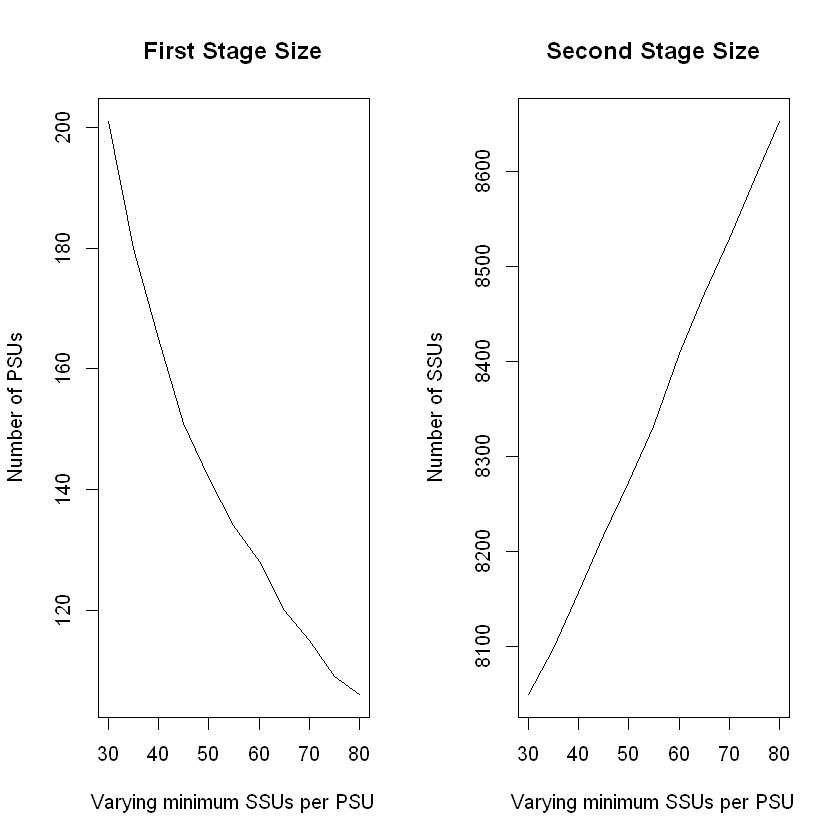

In [5]:
sens_min_SSU <- sensitivity_min_SSU (
             samp_frame=pop,
             errors=cv,
             id_PSU="municipality",
             id_SSU="id_ind",
             strata_var="stratum",
             target_vars=c("income_hh","active","inactive","unemployed"),
             deff_var="stratum",
             domain_var="region",
             delta=1,
             deff_sugg=1,
             min=30,
             max=80,
             plot=TRUE)

## Preparation of inputs for allocation steps

In [6]:
## Preparation of inputs for allocation steps
samp_frame <- pop
samp_frame$one <- 1
id_PSU <- "municipality"  
id_SSU <- "id_ind"        
strata_var <- "stratum"   
target_vars <- c("income_hh","active","inactive","unemployed")   
deff_var <- "stratum"     
domain_var <- "region"  
delta =  1       # households = survey units
minimum <- 50    # minimum number of SSUs to be interviewed in each selected PSU
deff_sugg <- 1.5 # suggestion for the deff value
 
inp1 <- prepareInputToAllocation1(samp_frame,
                                id_PSU,
                                id_SSU,
                                strata_var,
                                target_vars,
                                deff_var,
                                domain_var,
                                minimum,
                                delta,
                                deff_sugg)


Calculating strata...
Computations are being done on population data

Number of strata:  24
... of which with only one unit:  0
Calculating rho in strata...
Stratum  1000
Stratum  2000
Stratum  3000
Stratum  4000
Stratum  5000
Stratum  6000
Stratum  7000
Stratum  8000
Stratum  9000
Stratum  10000
Stratum  11000
Stratum  12000
Stratum  13000
Stratum  14000
Stratum  15000
Stratum  16000
Stratum  17000
Stratum  18000
Stratum  19000
Stratum  20000
Stratum  21000
Stratum  22000
Stratum  23000
Stratum  24000

In [7]:
head(inp1$strata)

,N,M1,M2,M3,M4,S1,S2,S3,S4,COST,CENS,DOM1,DOM2,STRATUM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1000,197007,23959.87,0.6650322,0.2285807,0.10638708,22179.08,0.4719792,0.4199185,0.3083324,1,0,1,2,1000
2000,261456,20966.65,0.6709886,0.2297519,0.09925953,19624.65,0.4698541,0.4206732,0.2990102,1,0,1,2,2000
3000,115813,19814.73,0.6644591,0.2315975,0.10394343,14754.88,0.4721792,0.4218532,0.3051871,1,0,1,2,3000
4000,17241,18732.72,0.6273418,0.2499275,0.12273070,13462.74,0.4835122,0.4329708,0.3281278,1,0,1,2,4000
5000,101067,22070.31,0.6134445,0.2338845,0.15267100,17187.98,0.4869603,0.4232996,0.3596701,1,0,1,2,5000
6000,47218,21069.07,0.6135796,0.2348469,0.15157355,17342.74,0.4869288,0.4239031,0.3586070,1,0,1,2,6000


In [8]:
head(inp1$deff)

,STRATUM,DEFF1,DEFF2,DEFF3,DEFF4,b_nar
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1.5,1.5,1.5,1.5,4925.17500
12,2000,1.5,1.5,1.5,1.5,1005.60000
18,3000,1.5,1.5,1.5,1.5,222.71731
19,4000,1.5,1.5,1.5,1.5,47.89167
20,5000,1.5,1.5,1.5,1.5,2526.67500
21,6000,1.5,1.5,1.5,1.5,786.96667


In [9]:
head(inp1$effst)

,STRATUM,EFFST1,EFFST2,EFFST3,EFFST4
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,1,1,1
2,2000,1,1,1,1
3,3000,1,1,1,1
4,4000,1,1,1,1
5,5000,1,1,1,1
6,6000,1,1,1,1


In [10]:
head(inp1$rho)

,STRATUM,RHO_AR1,RHO_NAR1,RHO_AR2,RHO_NAR2,RHO_AR3,RHO_NAR3,RHO_AR4,RHO_NAR4
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,0.0032494875,1,0.00001260175649,1,0.0000003631192,1,0.000039120880
2,2000,1,0.0028554017,1,0.00150936389450,1,0.0007420929883,1,0.000937018761
3,3000,1,0.0069678726,1,0.00162968276279,1,0.0006469515878,1,0.002837431259
4,4000,1,0.0114552934,1,0.00578473329221,1,0.0019797687826,1,0.008962657055
5,5000,1,0.0002677333,1,0.00000001682475,1,0.0000029484212,1,0.000003404961
6,6000,1,0.0057050500,1,0.00004270905958,1,0.0000397945795,1,0.000194411580


In [11]:
head(inp1$psu_file)

,PSU_ID,STRATUM,PSU_MOS
,<dbl>,<fct>,<dbl>
1,1,12000,1546
2,2,12000,936
3,3,12000,367
4,4,10000,13032
5,5,12000,678
6,6,11000,3193


In [12]:
head(inp1$des_file)

,STRATUM,STRAT_MOS,DELTA,MINIMUM
,<fct>,<dbl>,<dbl>,<dbl>
1,1000,197007,1,50
2,2000,261456,1,50
3,3000,115813,1,50
4,4000,17241,1,50
5,5000,101067,1,50
6,6000,47218,1,50


## Allocation

In [13]:
inp1$desfile$MINIMUM <- 50
alloc1 <- beat.2st(stratif = inp1$strata, 
                  errors = cv, 
                  des_file = inp1$des_file, 
                  psu_file = inp1$psu_file, 
                  rho = inp1$rho, 
                  deft_start = NULL,
                  effst = inp1$effst, 
                  minPSUstrat = 2,
                  minnumstrat = 50
                  )

  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 7887
2          1     31     104       135 8328
3          2     39     104       143 8317
4          3     38     104       142 8320


## Selection of PSUs (I stage)

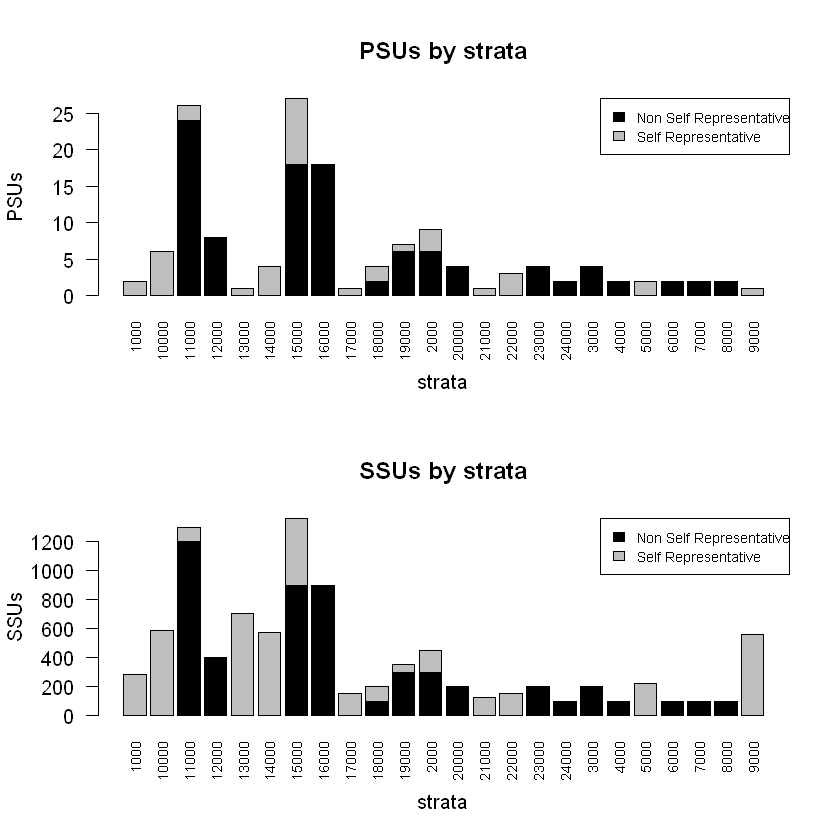

In [14]:
set.seed(1234)
sample_1st <- select_PSU(alloc1, type="ALLOC", pps=TRUE)

In [15]:
sample_1st$PSU_stats

STRATUM,PSU,PSU_SR,PSU_NSR,SSU,SSU_SR,SSU_NSR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,2,2,0,286,286,0
2000,9,3,6,452,152,300
3000,4,0,4,200,0,200
4000,2,0,2,100,0,100
5000,2,2,0,219,219,0
6000,2,0,2,100,0,100
7000,2,0,2,100,0,100
8000,2,0,2,100,0,100
9000,1,1,0,557,557,0


## Selection of SSUs (II stage)

In [16]:
samp <- select_SSU(df=pop,
                   PSU_code="municipality",
                   SSU_code="id_ind",
                   PSU_sampled=sample_1st$sample_PSU,
                   verbose=TRUE)


PSU =  1  *** Selected SSU =  50
PSU =  4  *** Selected SSU =  72
PSU =  6  *** Selected SSU =  50
PSU =  8  *** Selected SSU =  557
PSU =  11  *** Selected SSU =  105
PSU =  13  *** Selected SSU =  79
PSU =  15  *** Selected SSU =  50
PSU =  16  *** Selected SSU =  50
PSU =  17  *** Selected SSU =  50
PSU =  18  *** Selected SSU =  50
PSU =  21  *** Selected SSU =  50
PSU =  24  *** Selected SSU =  50
PSU =  29  *** Selected SSU =  50
PSU =  33  *** Selected SSU =  50
PSU =  34  *** Selected SSU =  50
PSU =  36  *** Selected SSU =  50
PSU =  37  *** Selected SSU =  50
PSU =  40  *** Selected SSU =  87
PSU =  41  *** Selected SSU =  58
PSU =  51  *** Selected SSU =  186
PSU =  56  *** Selected SSU =  50
PSU =  59  *** Selected SSU =  50
PSU =  61  *** Selected SSU =  50
PSU =  67  *** Selected SSU =  50
PSU =  72  *** Selected SSU =  50
PSU =  80  *** Selected SSU =  50
PSU =  82  *** Selected SSU =  50
PSU =  85  *** Selected SSU =  50
PSU =  89  *** Selected SSU =  50
PSU =  90  ***

In [17]:
nrow(samp)
sum(alloc1$alloc$ALLOC[-nrow(alloc1$alloc)])

[1] 9421

[1] 8320

In [18]:
nrow(pop)
sum(samp$weight)

[1] 2258507

[1] 2258507

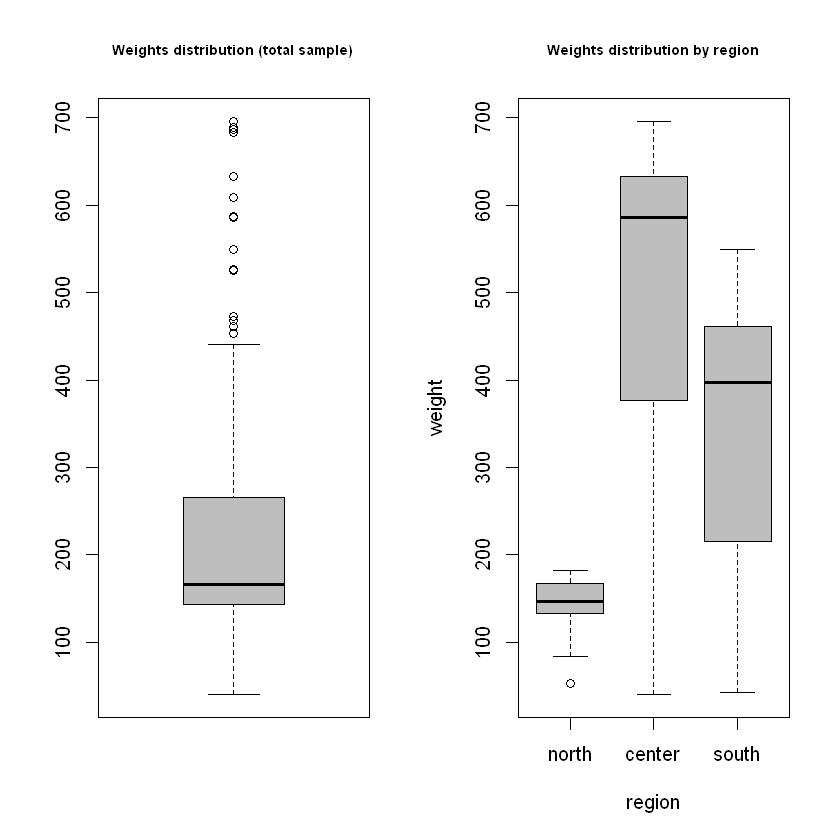

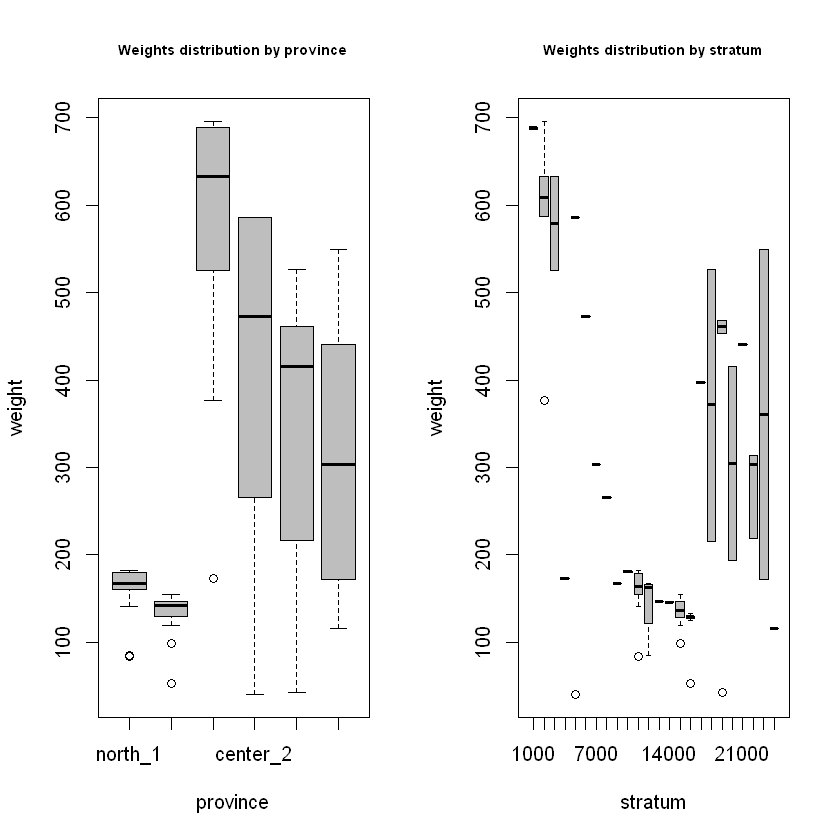

In [19]:
## Plot of weights distribution
par(mfrow=c(1, 2))
boxplot(samp$weight,col="grey")
title("Weights distribution (total sample)",cex.main=0.7)
boxplot(weight ~ region, data=samp,col="grey")
title("Weights distribution by region",cex.main=0.7)
par(mfrow=c(1, 2))
boxplot(weight ~ province, data=samp,col="grey")
title("Weights distribution by province",cex.main=0.7)
boxplot(weight ~ stratum, data=samp,col="grey")
title("Weights distribution by stratum",cex.main=0.7)

## Precision constraints compliance control (by simulation)

In [20]:
df=pop
df$one <- 1
PSU_code="municipality"
SSU_code="id_ind"
target_vars <- c("income_hh",
                 "active",
                 "inactive",
                 "unemployed")  

In [21]:
# Domain level = national
domain_var <- "one"
set.seed(1234)
eval11 <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    sample_1st$sample_PSU,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval11$coeff_var

  |======================================================================| 100%


CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0091,0.0086,0.0238,0.0346,DOM1


  |======================================================================| 100%


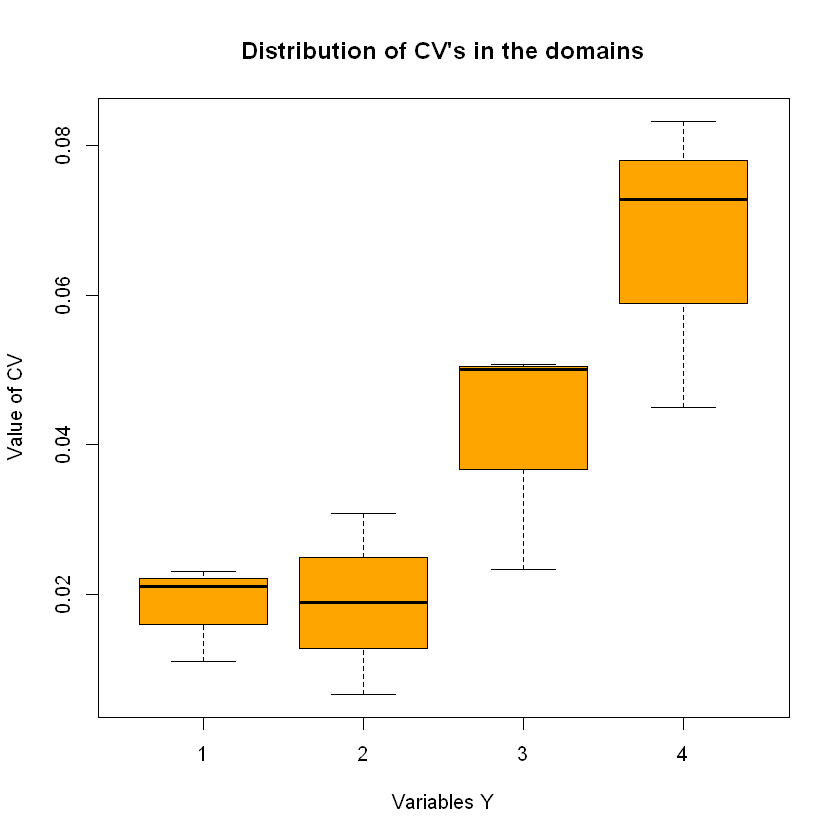

CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0109,0.0066,0.0234,0.0833,DOM1
0.0210,0.0189,0.0500,0.0728,DOM2
0.0231,0.0309,0.0508,0.0450,DOM3


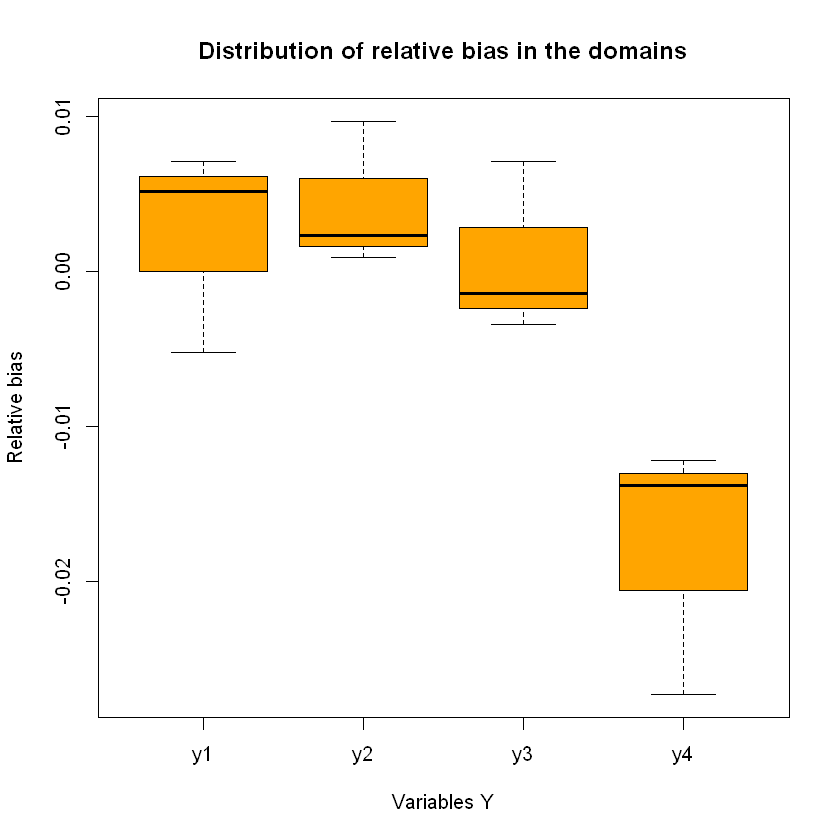

In [22]:
# Domain level = regional
domain_var <- "region"
set.seed(1234)
set.seed(1234)
eval12 <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    sample_1st$sample_PSU,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval12$coeff_var

In [23]:
alloc1$sensitivity

,Type,Dom,V1,V2,V3,V4
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,DOM1,1,1,0,1,1
6,DOM2,1,1,0,1,1181
10,DOM2,2,1,0,1,245
14,DOM2,3,184,1,45,1


In [24]:
save(samp,file="sample.RData")

# Scenario 2
One previous round of the sampling survey is available.

## Analysis of sampled data

In [25]:
library(ReGenesees)





--------------------------------------------------------

> The ReGenesees package has been successfully loaded. <

--------------------------------------------------------







Package: ReGenesees
Type: Package
Title: R Evolved Generalized Software for Sampling Estimates and Errors
        in Surveys
Description: Design-Based and Model-Assisted analysis of complex
        sampling surveys. Multistage, stratified, clustered, unequally
        weighted survey designs. Horvitz-Thompson and Calibration
        Estimators. Variance Estimation for nonlinear smooth estimators
        by Taylor-series linearization. Estimates, standard errors,
        confidence intervals and design effects for: Totals, Means,
        absolute and relative Frequency Distributions (marginal,
        conditional and joint), Ratios, Shares and Ratios of Shares,
        Multiple Regression Coefficients and Quantiles. Automated
        Linearization of Complex Analytic Estimators. Design Covariance
        and Correlation. Estimates, standard errors, confidence
        intervals and design effects for user-defined analytic
        estimators. Estimates and sampling errors for subpopulatio

In [26]:
load("sample.RData")
str(samp)

'data.frame':	9421 obs. of  20 variables:
 $ municipality : Factor w/ 142 levels "1","4","6","8",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id_ind       : int  11 19 34 67 141 166 170 191 208 308 ...
 $ region       : Factor w/ 3 levels "north","center",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ province     : Factor w/ 6 levels "north_1","north_2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ id_hh        : Factor w/ 963018 levels "H1","H10","H100",..: 1114 4447 10002 20002 45558 52224 54446 58891 63335 95557 ...
 $ stratum      : Factor w/ 24 levels "1000","2000",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ stratum_label: chr  "north_1_6" "north_1_6" "north_1_6" "north_1_6" ...
 $ sex          : int  2 2 2 1 1 1 1 2 1 2 ...
 $ cl_age       : Factor w/ 8 levels "(0,14]","(14,24]",..: 3 5 5 5 1 1 1 8 1 1 ...
 $ active       : num  1 1 0 1 0 0 0 0 0 0 ...
 $ income_hh    : num  17043 28143 4791 28043 27185 ...
 $ unemployed   : num  0 0 1 0 0 0 0 0 0 0 ...
 $ inactive     : num  0 0 0 0 1 1 1 1 1 1 ...
 $ Prob_1st     : num  0.1

In [27]:
## Sample design description
samp$stratum_2 <- as.factor(samp$stratum_2)
sample.des <- e.svydesign(samp, 
                          ids= ~ municipality + id_hh, 
                          strata = ~ stratum_2, 
                          weights = ~ weight,
                          self.rep.str = ~ SR,
                          check.data = TRUE)


# Empty levels found in factors: id_hh
# Empty levels have been dropped!



Warning message in e.svydesign(samp, ids = ~municipality + id_hh, strata = ~stratum_2, :
"Sampling variance estimation for this design will take into account only leading contributions, i.e. PSUs in not-SR strata and SSUs in SR strata (see ?e.svydesign and ?ReGenesees.options for details)"


In [29]:
## Find and collapse lonely strata
ls <- find.lon.strata(sample.des)
if (!is.null(ls)) sample.des <- collapse.strata(sample.des)

# No lonely PSUs found!



In [30]:
## Calibration with known totals
totals <- pop.template(sample.des,
             calmodel = ~ sex : cl_age, 
             partition = ~ region)
totals <- fill.template(pop, totals, mem.frac = 10)
sample.cal <- e.calibrate(sample.des, 
                          totals,
                          calmodel = ~ sex : cl_age, 
                          partition = ~ region,
                          calfun = "logit",
                          bounds = c(0.3, 2.6), 
                          aggregate.stage = 2,
                          force = FALSE)


# Coherence check between 'universe' and 'template': OK



## Preparation of inputs for allocation steps

In [31]:
samp_frame <- pop
RGdes <- sample.des
RGcal <- sample.cal
strata_var <- c("stratum")      
target_vars <- c("income_hh",
                 "active",
                 "inactive",
                 "unemployed")   
weight_var <- "weight"
deff_var <- "stratum"            
id_PSU <- c("municipality")      
id_SSU <- c("id_hh")             
domain_var <- c("region") 
delta <- 1                   
minimum <- 50                

inp2 <- prepareInputToAllocation2(
        samp_frame,  # sampling frame
        RGdes,       # ReGenesees design object
        RGcal,       # ReGenesees calibrated object
        id_PSU,      # identification variable of PSUs
        id_SSU,      # identification variable of SSUs
        strata_var,  # strata variable
        target_vars, # target variables
        deff_var,    # deff variable
        domain_var,  # domain variable
        delta,       # Average number of SSUs for each selection unit
        minimum      # Minimum number of SSUs to be selected in each PSU
      )

In [32]:
head(inp2$strata)

,stratum,STRATUM,N,M1,M2,M3,M4,S1,S2,S3,S4,COST,CENS,DOM1,DOM2
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1000,1000,196189,22364.93,0.6793373,0.2322720,0.08839079,16556.88,0.4667313,0.4222815,0.2838624,1,0,1,center
2,10000,10000,105863,29427.86,0.7921197,0.1912077,0.01667262,27040.22,0.4057907,0.3932522,0.1280416,1,0,1,north
3,11000,11000,205526,28506.72,0.7749079,0.2063259,0.01876620,43089.05,0.4176429,0.4046671,0.1356983,1,0,1,north
4,12000,12000,57552,24275.15,0.7521653,0.2222993,0.02553542,16210.24,0.4317553,0.4157912,0.1577446,1,0,1,north
5,13000,13000,103001,28517.71,0.7654855,0.2004329,0.03408161,22588.38,0.4236950,0.4003243,0.1814388,1,0,1,north
6,14000,14000,84100,24332.26,0.7365891,0.2336707,0.02974023,15393.85,0.4404834,0.4231651,0.1698698,1,0,1,north


In [33]:
head(inp2$deff)

,stratum,STRATUM,DEFF1,DEFF2,DEFF3,DEFF4,b_nar
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1000,0.992453,1.000576,1.001071,1.004864,143.00000
2,10000,10000,1.020615,1.014979,1.015570,1.002514,97.83333
3,11000,11000,1.661060,0.792896,0.637480,1.036756,50.00000
4,12000,12000,1.200498,2.667262,2.533419,1.983936,50.00000
5,13000,13000,1.014184,1.011510,1.013485,1.007290,703.00000
6,14000,14000,1.012919,0.996743,0.996826,1.010600,144.25000


In [34]:
head(inp2$effst)

,stratum,STRATUM,EFFST1,EFFST2,EFFST3,EFFST4
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1000,1.061891,0.9511291,0.9071854,1.0137193
2,10000,10000,1.005724,0.9077114,0.8991158,0.9780552
3,11000,11000,1.005722,0.9309392,0.9240808,0.9998968
4,12000,12000,1.026967,0.9241132,0.9117161,0.9911560
5,13000,13000,1.006354,0.9244961,0.9085689,0.9977077
6,14000,14000,1.002360,0.9348739,0.9237139,1.0065308


In [35]:
head(inp2$rho)

,STRATUM,RHO_AR1,RHO_NAR1,RHO_AR2,RHO_NAR2,RHO_AR3,RHO_NAR3,RHO_AR4,RHO_NAR4
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1000,1,-0.00005314789,1,0.000004056338,1,0.000007542254,1,0.00003425352
2,10000,1,0.00021289157,1,0.000154688468,1,0.000160791738,1,0.00002596213
3,11000,1,0.01349102041,1,-0.004226612245,1,-0.007398367347,1,0.00075012245
4,12000,1,0.00409179592,1,0.034025755102,1,0.031294265306,1,0.02008032653
5,13000,1,0.00002020513,1,0.000016396011,1,0.000019209402,1,0.00001038462
6,14000,1,0.00009018499,1,-0.000022736475,1,-0.000022157068,1,0.00007399651


In [36]:
head(inp2$psu_file)

,PSU_ID,STRATUM,PSU_MOS
,<dbl>,<fct>,<dbl>
1,309,1000,50845
2,330,1000,146162
3,292,2000,24794
4,293,2000,19609
5,300,2000,13897
6,304,2000,36195


In [37]:
head(inp2$des_file)

,STRATUM,STRAT_MOS,DELTA,MINIMUM
,<fct>,<dbl>,<dbl>,<dbl>
1,1000,197007,1,50
2,2000,261456,1,50
3,3000,115813,1,50
4,4000,17241,1,50
5,5000,101067,1,50
6,6000,47218,1,50


## Allocation

In [38]:
set.seed(1234)
inp2$des_file$MINIMUM <- 50
alloc2 <- beat.2st(stratif = inp2$strata, 
                  errors = cv, 
                  des_file = inp2$des_file, 
                  psu_file = inp2$psu_file, 
                  rho = inp2$rho, 
                  deft_start = NULL, 
                  effst = inp2$effst,
                  minnumstrat = 2, 
                  minPSUstrat = 2)

  iterations PSU_SR PSU NSR PSU Total  SSU
1          0      0       0         0 9557
2          1     71      92       163 8464
3          2     38     108       146 8398
4          3     38     108       146 8396


## Selection of PSUs (I stage)

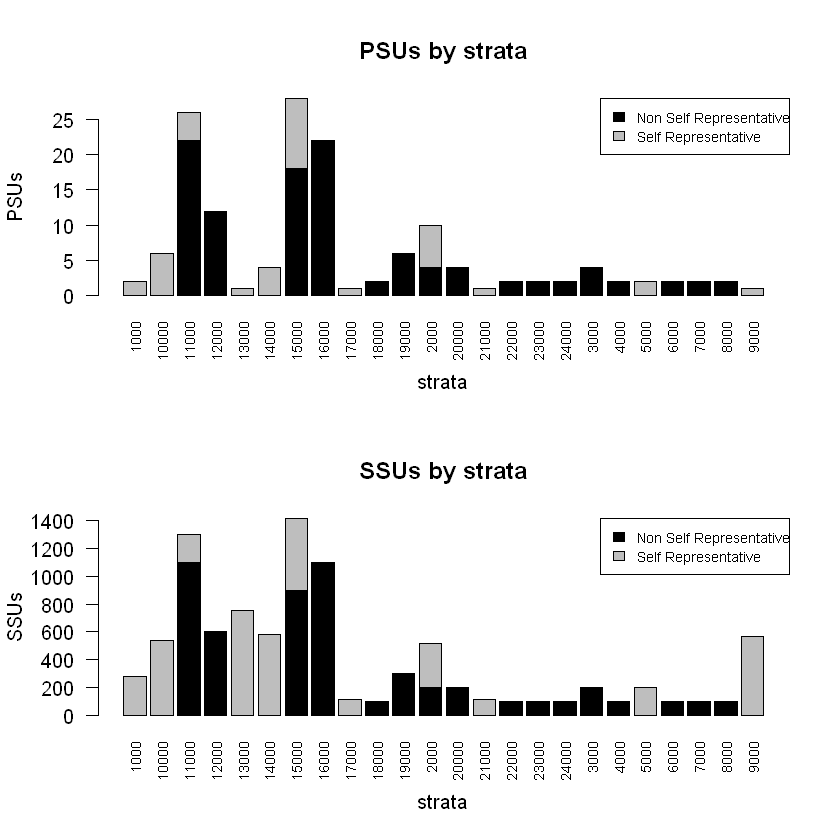

In [39]:
set.seed(1234)
sample_1st <- select_PSU(alloc2, type="ALLOC", pps=TRUE)

In [40]:
sample_1st$PSU_stats

STRATUM,PSU,PSU_SR,PSU_NSR,SSU,SSU_SR,SSU_NSR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,2,2,0,279,279,0
2000,10,6,4,517,317,200
3000,4,0,4,200,0,200
4000,2,0,2,100,0,100
5000,2,2,0,202,202,0
6000,2,0,2,100,0,100
7000,2,0,2,100,0,100
8000,2,0,2,100,0,100
9000,1,1,0,564,564,0


## Selection of SSUs (II stage)

In [41]:
set.seed(1234)
samp <- select_SSU(df=pop,
                   PSU_code="municipality",
                   SSU_code="id_ind",
                   PSU_sampled=sample_1st$sample_PSU,
                   verbose=TRUE)


PSU =  4  *** Selected SSU =  66
PSU =  8  *** Selected SSU =  564
PSU =  10  *** Selected SSU =  50
PSU =  11  *** Selected SSU =  96
PSU =  13  *** Selected SSU =  72
PSU =  15  *** Selected SSU =  50
PSU =  17  *** Selected SSU =  50
PSU =  19  *** Selected SSU =  50
PSU =  22  *** Selected SSU =  50
PSU =  27  *** Selected SSU =  50
PSU =  29  *** Selected SSU =  50
PSU =  34  *** Selected SSU =  50
PSU =  36  *** Selected SSU =  50
PSU =  40  *** Selected SSU =  79
PSU =  41  *** Selected SSU =  53
PSU =  44  *** Selected SSU =  50
PSU =  50  *** Selected SSU =  50
PSU =  51  *** Selected SSU =  171
PSU =  52  *** Selected SSU =  50
PSU =  53  *** Selected SSU =  50
PSU =  55  *** Selected SSU =  50
PSU =  56  *** Selected SSU =  50
PSU =  59  *** Selected SSU =  50
PSU =  61  *** Selected SSU =  50
PSU =  64  *** Selected SSU =  50
PSU =  67  *** Selected SSU =  50
PSU =  71  *** Selected SSU =  50
PSU =  72  *** Selected SSU =  50
PSU =  73  *** Selected SSU =  50
PSU =  77  **

In [42]:
nrow(samp)
sum(alloc2$alloc$ALLOC[-nrow(alloc2$alloc)])

[1] 9579

[1] 8396

In [43]:
nrow(pop)
sum(samp$weight)

[1] 2258507

[1] 2258507

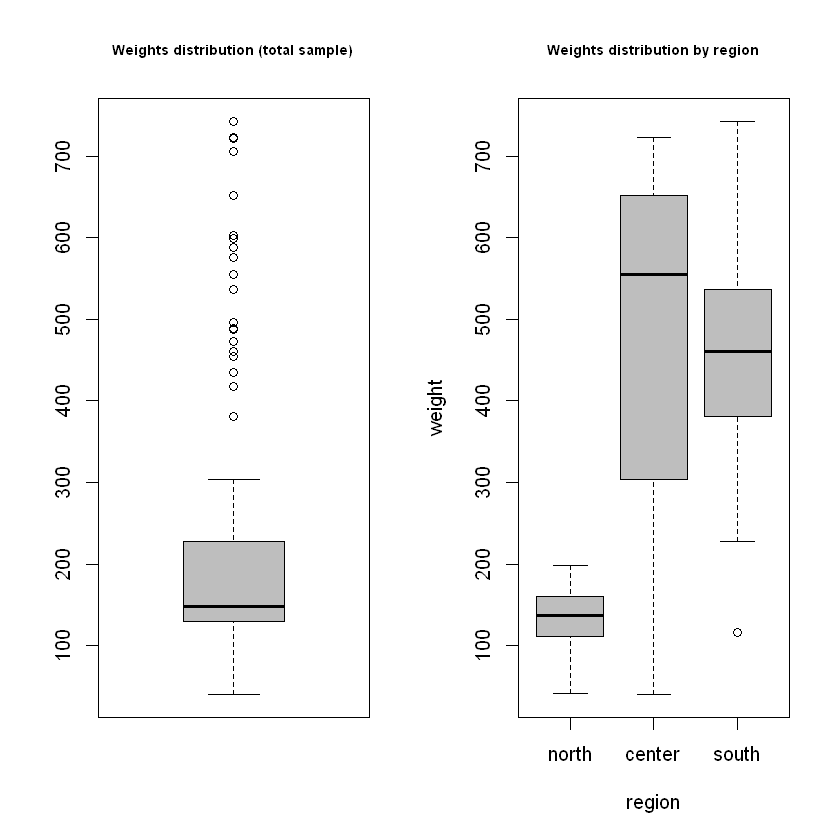

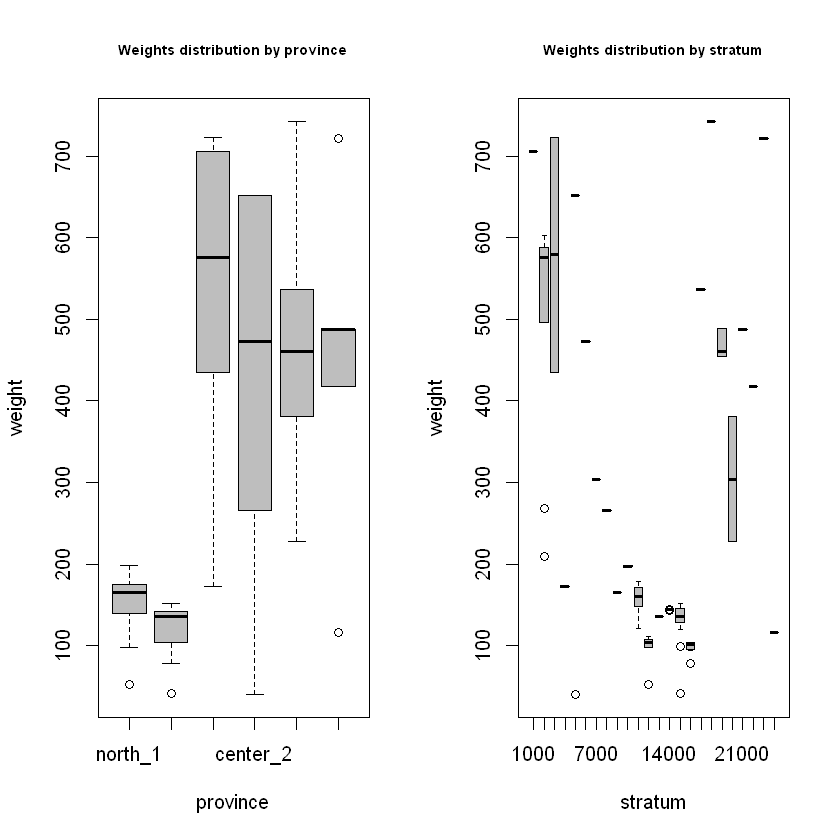

In [44]:
## Plot of weights distribution
par(mfrow=c(1, 2))
boxplot(samp$weight,col="grey")
title("Weights distribution (total sample)",cex.main=0.7)
boxplot(weight ~ region, data=samp,col="grey")
title("Weights distribution by region",cex.main=0.7)
par(mfrow=c(1, 2))
boxplot(weight ~ province, data=samp,col="grey")
title("Weights distribution by province",cex.main=0.7)
boxplot(weight ~ stratum, data=samp,col="grey")
title("Weights distribution by stratum",cex.main=0.7)

## Precision constraints compliance control (by simulation)

In [45]:
df=pop
df$one <- 1
PSU_code="municipality"
SSU_code="id_ind"
target_vars <- c("income_hh",
                 "active",
                 "inactive",
                 "unemployed")  

In [46]:
# Domain level = national
domain_var <- "one"
set.seed(1234)
eval21 <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    PSU_sampled=sample_1st$sample_PSU,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval21$coeff_var

  |======================================================================| 100%


CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0126,0.0097,0.0252,0.0361,DOM1


  |======================================================================| 100%


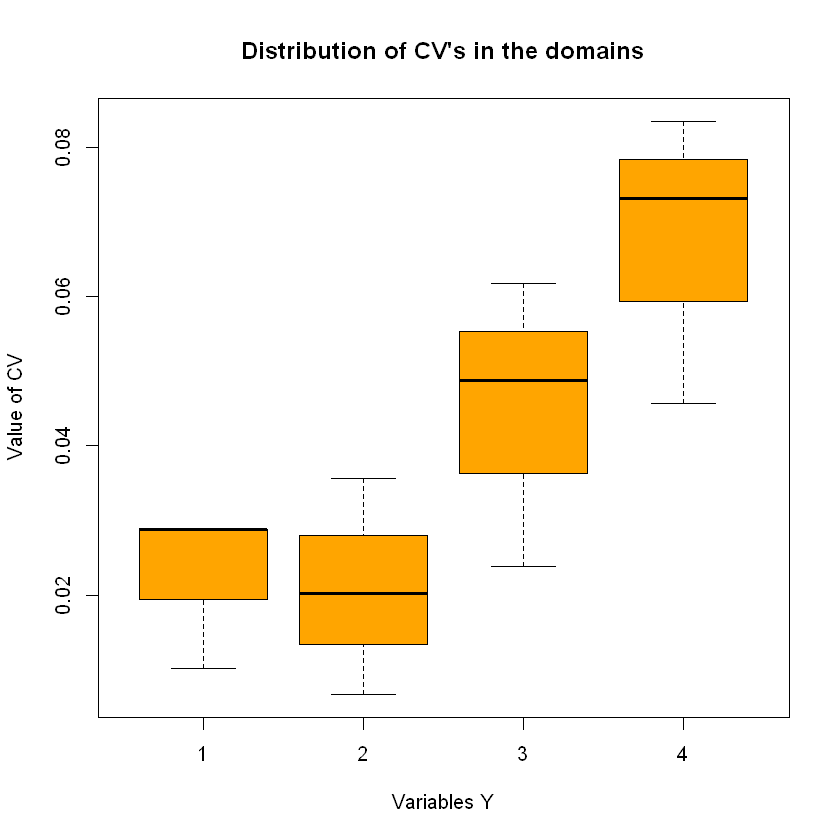

CV1,CV2,CV3,CV4,dom
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.0102,0.0067,0.0238,0.0835,DOM1
0.0287,0.0202,0.0488,0.0731,DOM2
0.0290,0.0357,0.0617,0.0457,DOM3


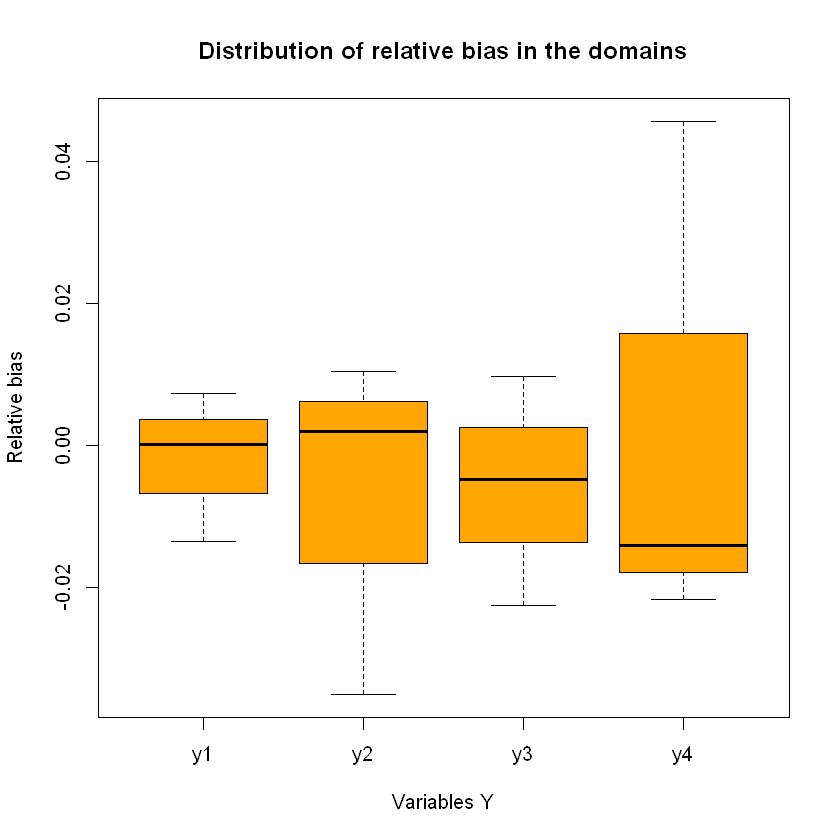

In [47]:
# Domain level = regional
domain_var <- "region"
set.seed(1234)
eval22 <- eval_2stage(df,
                    PSU_code,
                    SSU_code,
                    domain_var,
                    target_vars,
                    PSU_sampled=sample_1st$sample_PSU,
                    nsampl=100, 
                    writeFiles=FALSE,
                    progress=TRUE) 
eval22$coeff_var

In [48]:
alloc2$sensitivity

,Type,Dom,V1,V2,V3,V4
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,DOM1,1,1,1,1,1
6,DOM2,1,1,0,1,1273
10,DOM2,2,1,1,14,211
14,DOM2,3,114,1,66,1
